In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
resultados = pd.read_csv("gender_submission.csv")
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

In [5]:
test_data = test_data.merge(resultados, how = "inner")

In [6]:
# Analisis de valores nulos

In [10]:
(train_data.isnull().sum()/len(train_data)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

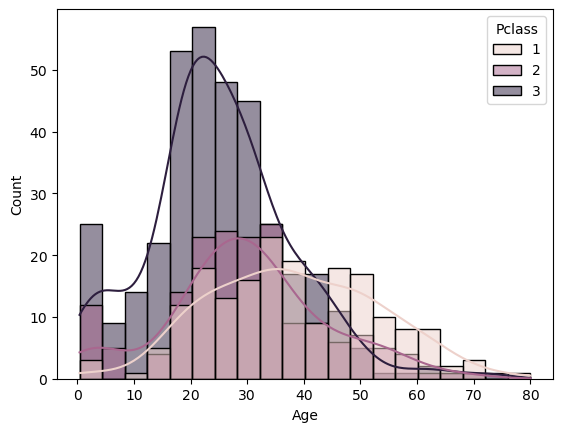

In [12]:
sns.histplot(x=train_data.Age, kde = True, hue = train_data.Pclass)

In [14]:
promedio = train_data["Age"].mean()

In [16]:
train_data["Age"].fillna(promedio, inplace = True)
test_data["Age"].fillna(promedio, inplace = True)

C:\Users\Thomas\AppData\Local\Temp\ipykernel_7688\486799676.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Age"].fillna(promedio, inplace = True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_7688\486799676.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [18]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [22]:
train_data.drop(columns = "Cabin", inplace = True)
test_data.drop(columns = "Cabin", inplace = True)

<Axes: xlabel='Embarked', ylabel='Count'>

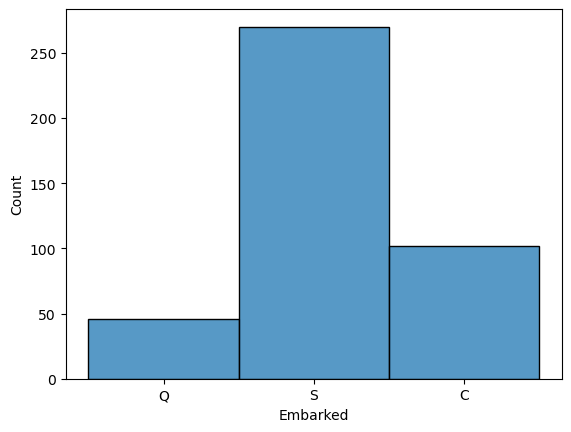

In [24]:
sns.histplot(data = test_data.Embarked)

In [26]:
moda = train_data.Embarked.mode()

In [28]:
train_data["Embarked"] = train_data["Embarked"].fillna(moda[0]) 

In [30]:
moda = test_data.Embarked.mode()
test_data["Embarked"] = test_data["Embarked"].fillna(moda[0])

In [32]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [34]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Survived       0
dtype: int64

<Axes: xlabel='Fare', ylabel='Count'>

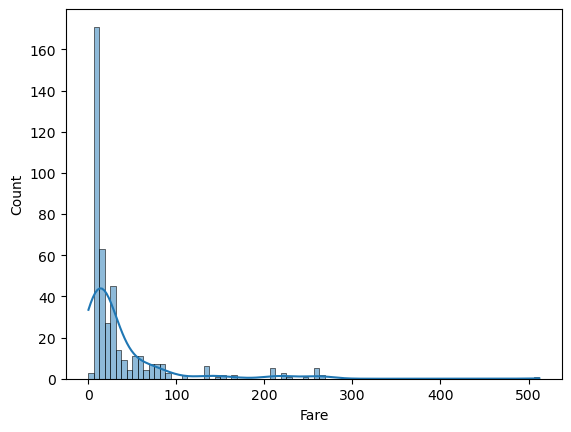

In [36]:
sns.histplot(data = test_data.Fare, kde = True)

In [38]:
median = test_data.Fare.median()

In [40]:
test_data.Fare = test_data.Fare.fillna(median)

In [42]:
#Ahora haremos un analisis exploratorio básico, una vez tengamos los resultados haremos un dashboard en Power BI

<Axes: xlabel='Pclass', ylabel='count'>

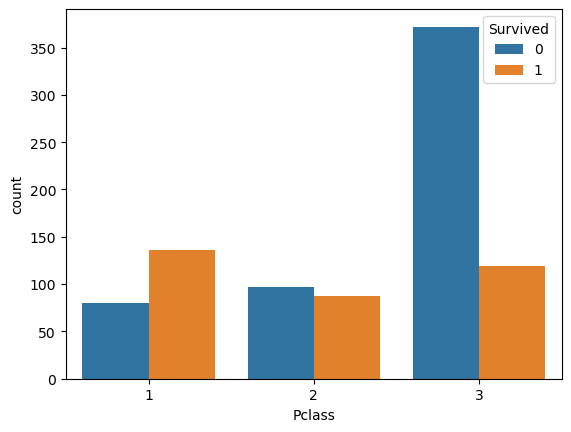

In [44]:
sns.countplot(data = train_data, x = "Pclass", hue = "Survived")

<Axes: xlabel='Pclass', ylabel='count'>

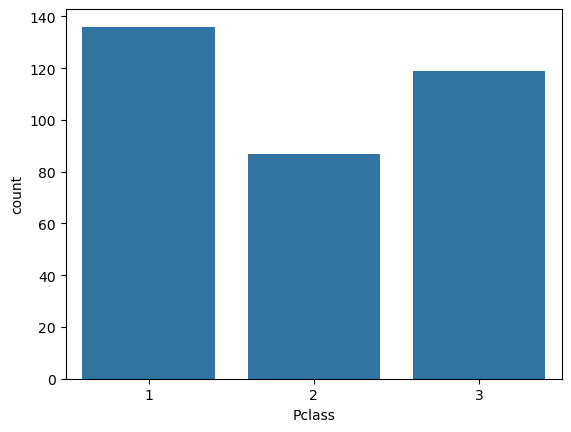

In [46]:
sns.countplot(data = train_data.loc[train_data.Survived == 1,:], x = "Pclass")

<Axes: xlabel='Sex', ylabel='count'>

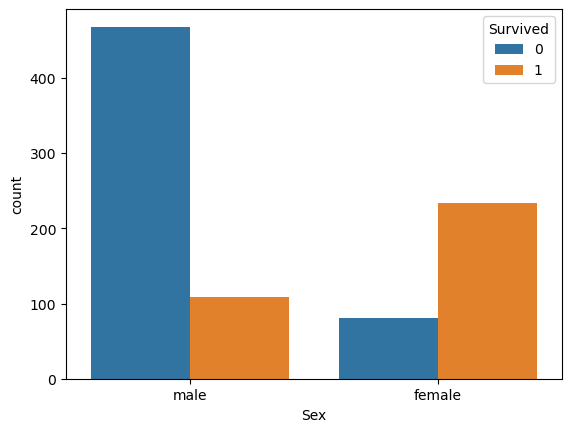

In [48]:
sns.countplot(data = train_data, x = "Sex", hue = "Survived")

(0.0, 100.0)

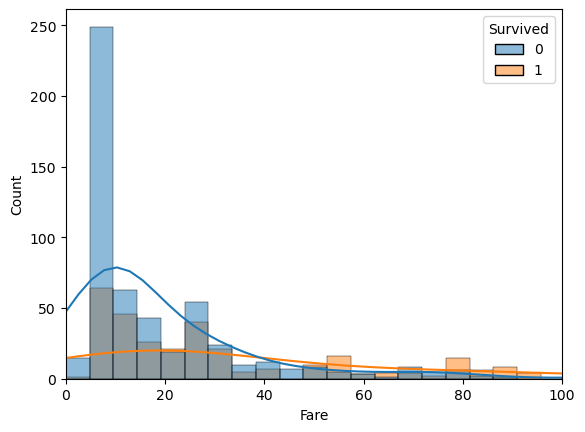

In [50]:
sns.histplot(x = train_data.Fare, hue = train_data.Survived, kde = True)
plt.xlim((0,100))


<Axes: xlabel='Age', ylabel='Count'>

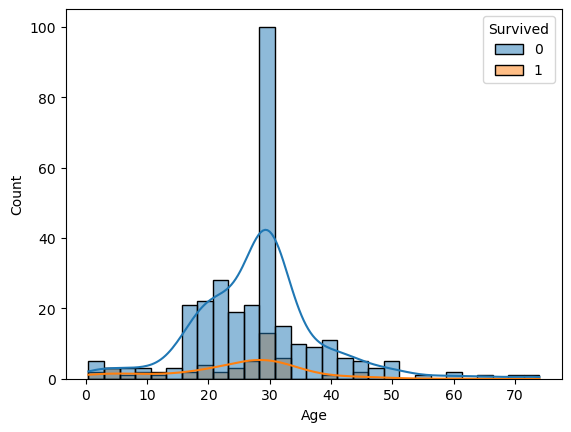

In [52]:
sns.histplot(data = train_data.loc[(train_data.Pclass == 3) & (train_data.Sex == "male"),:],x = "Age", hue = "Survived", kde = True)

In [54]:
train_data.to_csv('train_data.csv')
#Dummy variables

In [56]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [58]:
test_data = pd.get_dummies(
    test_data, 
    columns=["Embarked","Sex"],
    drop_first = True
)

train_data = pd.get_dummies(
    train_data, 
    columns=["Embarked","Sex"],
    drop_first = True
)

In [60]:
test_data.drop(columns=["Name", "Ticket", "PassengerId"], inplace=True)
train_data.drop(columns=["Name", "Ticket", "PassengerId"], inplace=True)


In [62]:
train_data.drop(columns=["Name", "Ticket", "PassengerId"], inplace=True)

KeyError: "['Name', 'Ticket', 'PassengerId'] not found in axis"

In [ ]:
# Modelo de regresión logística de Machine Learning

In [65]:
from sklearn.linear_model import LogisticRegression

In [67]:
X_train = train_data.loc[:,train_data.columns != "Survived"]
y_train = train_data.loc[:, "Survived"]

In [69]:
modelo = LogisticRegression(max_iter = 1000000)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000000)

In [71]:
X_test = test_data.loc[:,test_data.columns != "Survived"]
y_real = test_data["Survived"]

In [73]:
test_data["y_pred"] = modelo.predict(X_test) 
test_data["y_pred_proba"]  = modelo.predict_proba(X_test)[:, 1].round(2) 
test_data["y_pred_20_porciento"] = (test_data["y_pred_proba"] > 0.2) * 1

test_data.head(20)

,Pclass,Age,SibSp,Parch,Fare,Survived,Embarked_Q,Embarked_S,Sex_male,y_pred,y_pred_proba,y_pred_20_porciento
0,3,34.500000,0,0,7.8292,0,True,False,True,0,0.11,0
1,3,47.000000,1,0,7.0000,1,False,True,False,0,0.35,1
2,2,62.000000,0,0,9.6875,0,True,False,True,0,0.11,0
3,3,27.000000,0,0,8.6625,0,False,True,True,0,0.10,0
4,3,22.000000,1,1,12.2875,1,False,True,False,1,0.57,1
5,3,14.000000,0,0,9.2250,0,False,True,True,0,0.16,0
6,3,30.000000,0,0,7.6292,1,True,False,False,1,0.67,1
7,2,26.000000,1,1,29.0000,0,False,True,True,0,0.20,0
8,3,18.000000,0,0,7.2292,1,False,False,False,1,0.77,1
9,3,21.000000,2,0,24.1500,0,False,True,True,0,0.07,0


In [75]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [77]:
matriz_confusion = confusion_matrix(test_data["Survived"], test_data["y_pred"])
matriz_confusion

array([[253,  13],
       [ 11, 141]], dtype=int64)

In [79]:
TN = matriz_confusion[0][0]
TP = matriz_confusion[1][1]
FN = matriz_confusion[1][0]
FP = matriz_confusion[0][1]

In [81]:
Accuracy = (TN + TP) / (TN+TP+FN+FP)
Accuracy

0.9425837320574163

In [83]:
sensibility = TP / (TP + FN)
sensibility

0.9276315789473685

<Axes: >

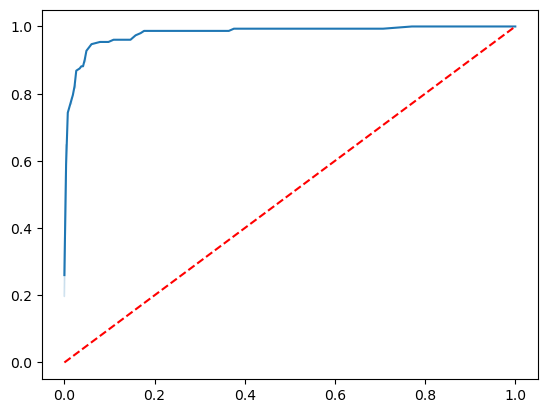

In [85]:
#roc curve
especificidad_inv, sensibilidad, umbral = roc_curve(test_data["Survived"],test_data["y_pred_proba"])

recta_x = [i * 0.01 for i in range(101)]
recta_y = recta_x
sns.lineplot(x = especificidad_inv, y = sensibilidad)
sns.lineplot(x = recta_x, y = recta_y, ls = "--", c = "r")

In [87]:
roc_auc_score(test_data["Survived"],test_data["y_pred_proba"])

0.9802384250098931

In [89]:
#Would have I survived?

In [91]:
train_data.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,0,7.25,False,True,True


In [93]:
modelo.predict([[3,23,0,0,22.20,False, True, True]])

C:\Users\Thomas\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [95]:
modelo.predict([[2,23,0,0,22.20,False, True, True]])

C:\Users\Thomas\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [97]:
modelo.predict([[1,23,0,0,22.20,False, True, True]])

C:\Users\Thomas\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [ ]:
#Only if I had been travelling in first class!

In [99]:
modelo.predict([[3,23,0,0,22.20,False, True, False]])

C:\Users\Thomas\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)